|  |
|:--|
| <img src ='https://bit.ly/39XPeCc' width=200 align='left'>
|<h1>    Random Forest - Iris
</h1>    * **Iris 데이터를 이용해 간단한 랜덤 포레스트 구현** = https://jfun.tistory.com/43


1. **Iris Data 소개**
> - Iris Data는 붓꽃 3종류를 기록한 데이터.
> - Iris Data는 붓꽃 잎과 꽃받침의 길이/너비 4개 features로 구성.
> - 목표데이터(y)는 붓꽃 종류로 0, 1, 2로 되어있다
> - 붓꽃의 종류는 각각 setosa, versicolor, virginica를 나타낸다.
> - 전체 Data 갯수는 150개 (line)이다.

* [**Sk-lean RandomForest Classifier Documentation**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)


## 사용함수의 정의

In [1]:
""" 
# 기본적인 module import 위치로 작업폴더 변경 getcwd() --> chidr()
# HOME 을 지정하고 작업폴더를 HOME 으로 변경.
"""
import os

HOME= 'dacon_competition_2020'
dir_base = "".join(os.getcwd().partition(HOME)[:2]) + "\\"
os.chdir(dir_base)     

In [2]:
from _assets.config_dirs import *
from _assets.modules import *


# 화일분석에 필요한 공동폴더를 등록합니다.
- asset = dir_base + '_assets/'
- statics dir_base + '_statics/'

#  echo = True : SYS.PATH INSERT 상황 보여줌


# OS 화일 및 DF 정보조회를 위한 탐색 모듈



In [3]:
"""
# RandomForestClassifier 클래스를 import
"""
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [4]:
"""
# Loading the Iris data-set
# sklearn.utils.Bunch Object
"""
iris = load_iris()             # sklearn.utils.Bunch

"""
# training data 설정
# type(x_train), type(y_train)  # (numpy.ndarray, numpy.ndarray)
# x_train.shape, y_train.shape   # ((120, 4), (120,))
# 150개 --> 120개 + 30로 나눠서 30문제로 남겨 놈 = 수동으로 나눈다 120:30 (20%)
"""
x_train = iris.data[:-30]       # 120개
x_test = iris.data[-30:]        #  30개

y_train = iris.target[:-30]     # 120개     
y_test = iris.target[-30:]      #  30개    

In [5]:
"""
#  데이터 갯수와 값을 확인해 본다.
"""
type(x_train), type(y_train)      # numpy.ndarray

# ((120, 4), (120,), (30, 4), (30,))
x_train.shape, y_train.shape, x_test.shape, y_test.shape, 

x_train[:2], x_test[:2]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2]]),
 array([[6.9, 3.2, 5.7, 2.3],
        [5.6, 2.8, 4.9, 2. ]]))

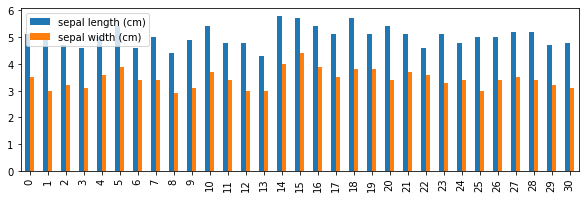

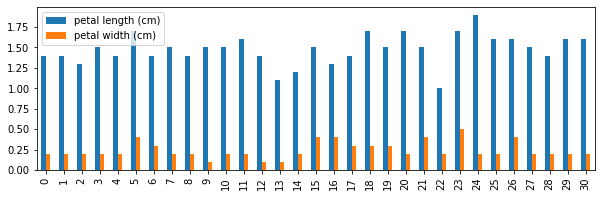

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


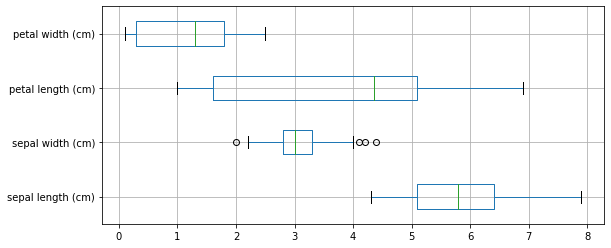

In [6]:
"""
# pd.DataFrame 을 만들어 Data 를 둘러본다.
"""

df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris.loc[:30,['sepal length (cm)','sepal width (cm)']].plot.bar(figsize=(10,3))
df_iris.loc[:30,['petal length (cm)','petal width (cm)']].plot.bar(figsize=(10,3))
plt.show()

df_iris.boxplot(figsize=(9,4), vert=False)
df_iris.head(3)

In [7]:
"""
# tree개수 Random Forest 분류 모듈 생성
# 그냥 Default 값을 사용한다.
"""
rfc = RandomForestClassifier(                        # 모두 default값.
                    bootstrap=True,                  # 
                    ccp_alpha=0.0,                   # 
                    class_weight=None,               # 
                    criterion='gini',                # 
                    max_depth=None,                  # 
                    max_features='auto',             # 
                    max_leaf_nodes=None,             # 
                    max_samples=None,                # 
                    min_impurity_decrease=0.0,       # 
                    min_impurity_split=None,         # 
                    min_samples_leaf=1,              # 
                    min_samples_split=2,             # 
                    min_weight_fraction_leaf=0.0,    # 
                    n_estimators=10,                 # 
                    n_jobs=None,                     # 
                    oob_score=False,                 # 
                    random_state=None,               # 
                    verbose=0,                       # 
                    warm_start=False,                # 
                )

In [8]:
"""
# rfc_00.fin()에 훈련 데이터를 입력해 Random Forest 모듈을 학습
# Test data를 입력해 target data를 예측 (매번 달라짐)
# 예측 결과 precision과 실제 test data의 target을 비교
# Random forest 정확도 측정
"""

rfc.fit(x_train, y_train)
pred = rfc.predict(x_test)

print(pred == y_test)
print(rfc.score(x_test, y_test))
print('\n', '--' * 30)
print("Accuracy is: ", accuracy_score(pred, y_test))
print(classification_report(pred, y_test))

[ True False  True False  True  True False False  True  True  True  True
  True False  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True]
0.8

 ------------------------------------------------------------
Accuracy is:  0.8
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.80      1.00      0.89        24

    accuracy                           0.80        30
   macro avg       0.40      0.50      0.44        30
weighted avg       0.64      0.80      0.71        30



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Data를 Shuffling 해서 다시 시작해 본다
- 이번엔 자동 data-set 분할 및 k-fold cross-validation 실시

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
"""
# Loading the Iris data-set
# sklearn.utils.Bunch Object
# train 과 test = 80:20 으로 나눈다
"""
iris = load_iris()             # sklearn.utils.Bunch

x = iris.data
y = iris.target

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

In [11]:
"""
#  데이터 갯수와 값을 확인해 본다.
# ((120, 4), (30, 4), (120,), (30,))
"""

# ((120, 4), (30, 4), (120,), (30,))
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape 

print(f"y_test (last 30)     = {y_test}")   # 기존 테스트 데이터는 뒤에서 30개
print(f"Y_test (shuffled 30) = {Y_test}")   # 자동 테스트 데이터는 shuffle로 30개

y_test (last 30)     = [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Y_test (shuffled 30) = [2 1 2 2 0 2 2 0 1 2 0 2 1 1 0 2 2 0 0 0 2 2 0 0 0 0 2 1 2 0]


In [12]:
"""
# tree개수 Random Forest 분류 모듈 생성
# 그냥 Default 값을 사용한다.
# 차이점 = 정렬된 Data 사용 <==> shuffled data-set 사용
"""
rfc_01 = RandomForestClassifier(                     # 모두 default값.
                    bootstrap=True,                  # 
                    ccp_alpha=0.0,                   # 
                    class_weight=None,               # 
                    criterion='gini',                # 
                    max_depth=None,                  # 
                    max_features='auto',             # 
                    max_leaf_nodes=None,             # 
                    max_samples=None,                # 
                    min_impurity_decrease=0.0,       # 
                    min_impurity_split=None,         # 
                    min_samples_leaf=1,              # 
                    min_samples_split=2,             # 
                    min_weight_fraction_leaf=0.0,    # 
                    n_estimators=10,                 # 
                    n_jobs=None,                     # 
                    oob_score=False,                 # 
                    random_state=None,               # 
                    verbose=0,                       # 
                    warm_start=False,                # 
                )

In [13]:
"""
# X_train과 Y_train을 입력해 모듈을 학습 시킨다.
"""

rfc_01.fit(X_train, Y_train) 
prediction_1 = rfc_01.predict(X_test)

print(prediction_1 == Y_test)
print("Accuracy is: ", accuracy_score(prediction_1, Y_test))
print("----" * 20)
print(classification_report(prediction_1, Y_test))

[ True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True False  True]
Accuracy is:  0.9
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.80      0.67      0.73         6
           2       0.85      0.92      0.88        12

    accuracy                           0.90        30
   macro avg       0.88      0.86      0.87        30
weighted avg       0.90      0.90      0.90        30



In [14]:
"""
# Initialize the model
# 트리수=200개, OOB 스코어링을 사용한다.
"""
rfc_02 = RandomForestClassifier(
                            n_estimators=200,     # Number of trees = 200개
                            max_features=4,       # Num features considered
                            oob_score=True,       # Use OOB scoring
                        )

In [15]:
rfc_02.fit(X_train, Y_train)
pred_02 = rfc_02.predict(X_test)

print(pred_02 == Y_test)
print("Accuracy is : ", accuracy_score(pred_02, Y_test))
print("----" * 20)
print(classification_report(pred_02, Y_test))

[ True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True]
Accuracy is :  0.9333333333333333
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.80      0.80      0.80         5
           2       0.92      0.92      0.92        13

    accuracy                           0.93        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.93      0.93      0.93        30



In [16]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
"""
# 각 feature의 중요도를 확인 한다.
"""

for feature, imp in zip(iris.feature_names, rfc_02.feature_importances_):
    print(f"* {feature:18} = {imp}")

* sepal length (cm)  = 0.0068275285630978585
* sepal width (cm)   = 0.00724664724463915
* petal length (cm)  = 0.31729330019731955
* petal width (cm)   = 0.6686325239949434


 ## 출처 : 파이썬을 이용한 빅데이터 분석

In [18]:
rfc_02.feature_importances_

array([0.00682753, 0.00724665, 0.3172933 , 0.66863252])

In [19]:
dict(zip(iris.feature_names, rfc_02.feature_importances_))

{'sepal length (cm)': 0.0068275285630978585,
 'sepal width (cm)': 0.00724664724463915,
 'petal length (cm)': 0.31729330019731955,
 'petal width (cm)': 0.6686325239949434}

In [21]:
rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
rfc_01

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
rfc_02

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)